# Comparison: Reinforced learning vs Dynamic programming

Dynamic programming can be used to solve a life cycle model, as shown by Määttänen (2013). Here we compare a rather simple grid based method to solve _unemployment-v0_ environment, and compare the results againt those obtained by Reinforced Learning.

Tarkastellussa elinkaarimallissa _unemployment-v0_ on huomioitu vain kolme tilaa: työssä, työtön ja vanhuuseläkkeellä. Jokainen henkilö tekee vuosittain päätöksen työhönosallistumisesta ja alimman vanhuuseläkeiän täyttämisen jälkeen valinnan työn, työttömyyden ja vanhuuseläkkeen välillä. 

Mallissa palkat pidetään samoina läpi koko elinkaaren. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle, DynProgLifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Dynaaminen ohjelmointi

Ajetaan elämänkaarimallia sekä dynaamisella ohjelmoinnilla. Verrataan tuloksia, jotta näemme, miten hyvin RL toimii. Ajoajat eivät ole kovin vertailukelpoisia.

Dynaaminen ohjelmointi-koodi toimii ainoastaan minimaalisen mallin kanssa.

minimal model
Optimizing behavior


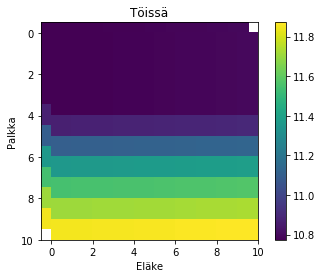

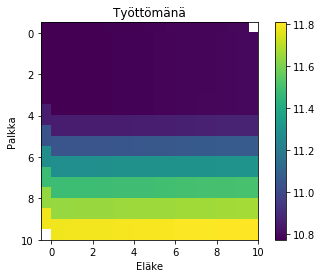

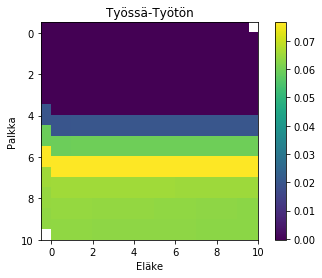

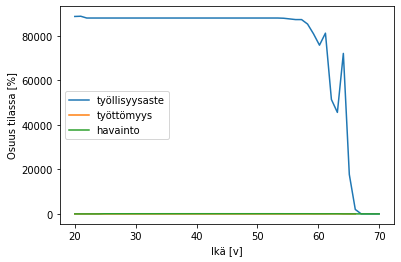

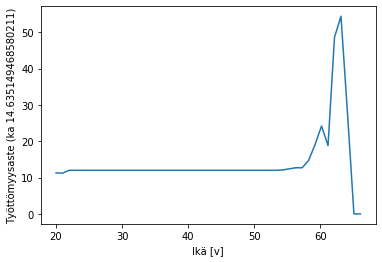

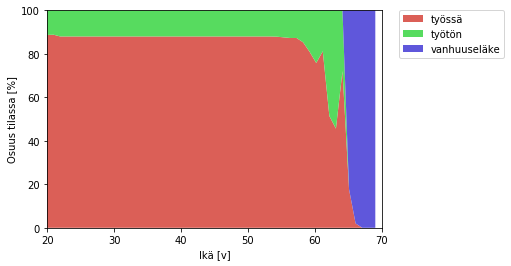

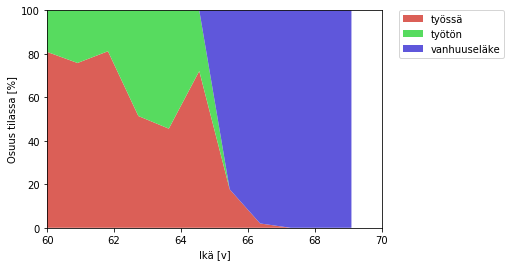

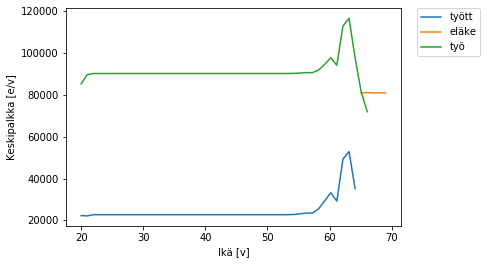

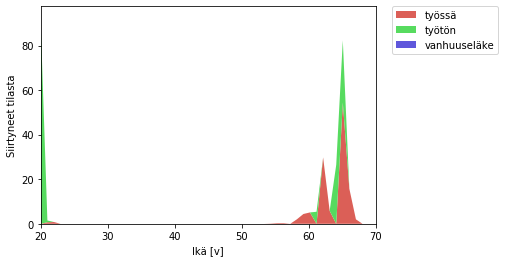

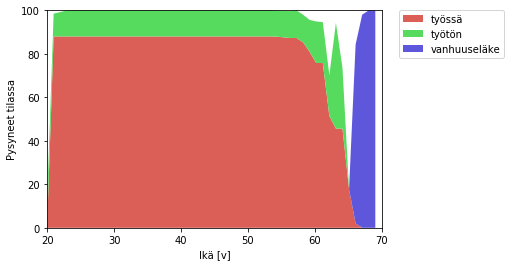

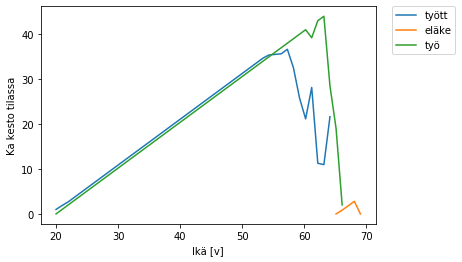

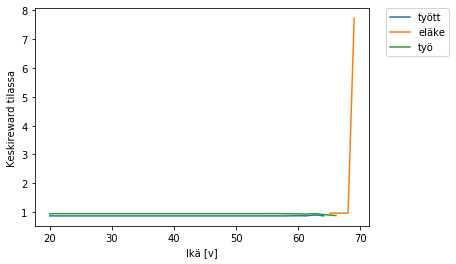

No handles with labels found to put in legend.


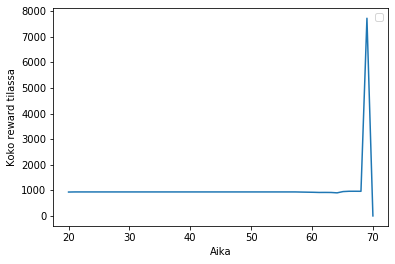

Yhteensä reward 54.53734206192784


In [2]:
cc3=DynProgLifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
file='best/dynamic_prog_V_minimal.h5'
cc3.train(save=file)
cc3.simulate(load=file)
cc3.plot_V(2)
cc3.render()

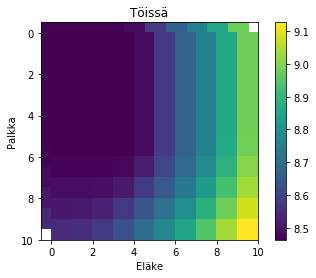

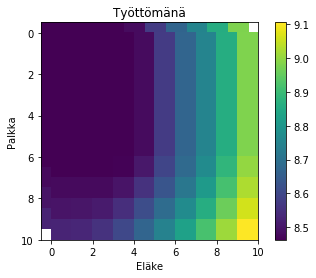

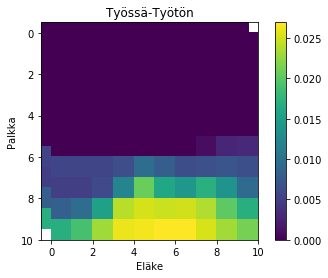

In [3]:
cc3.plot_V(45)

In [4]:
#cc3=DynProgLifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
#cc3.simulate(save='results/dp_minimal',pop=10_000,load='best/dynamic_prog_V.h5')
#cc3.plot_actV(1)
#cc3.render()

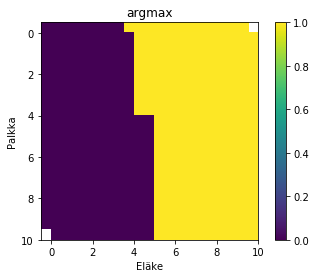

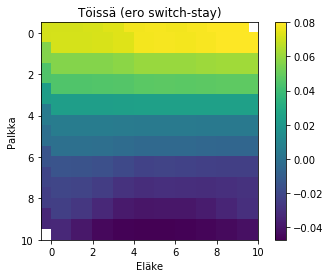

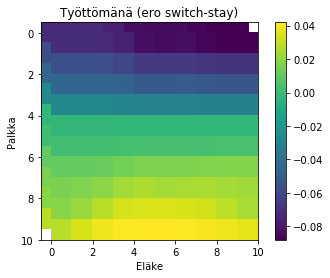

In [5]:
cc3.plot_actV(40,emp=0,time_in_state=1)
cc3.plot_actV_diff(40)

# Reinforced Learning

Reinforced learning on toinen tapa laskea tuloksia elinkaarimallista. Tässä tarkastelemme kahta eri versiota: Softmax- ja Deterministic. Softmax-mallissa (deterministic=False) käytetään softmax-todennäköisyyksiä seuraavan toimen valinnassa. Deterministisessä valitaan todennäköisin toimi. 

Deterministinen on näistä kahdesta lähestymistavasta lähempänä taloustieteen utiliteetin maksimointia. Osoittautuukin, että tämä vastaa paremmin hilalaskelmia.

minimal model
Parameters of lifecycle:
timestep 1.0
gamma 0.92 (0.92 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness None
deterministic False

include_putki None
step 1.0

predict...
simulating  saved/malli_perusmini99
predicting...


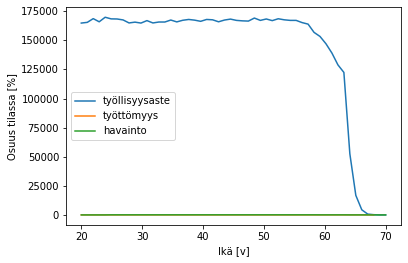

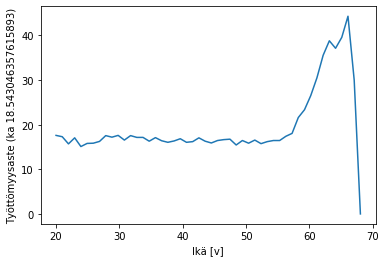

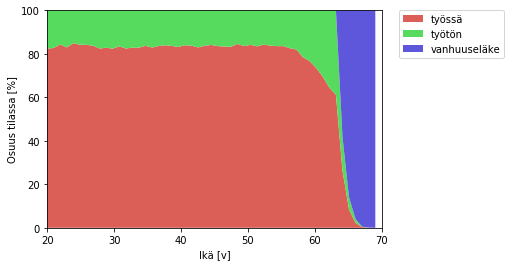

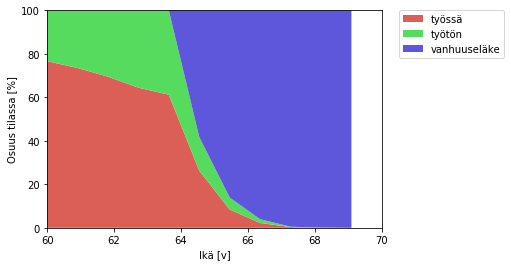

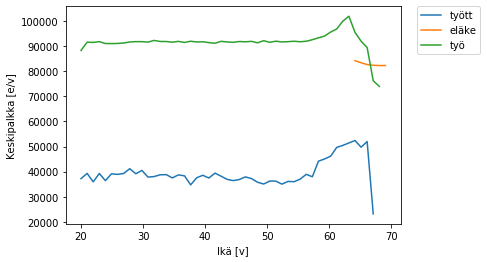

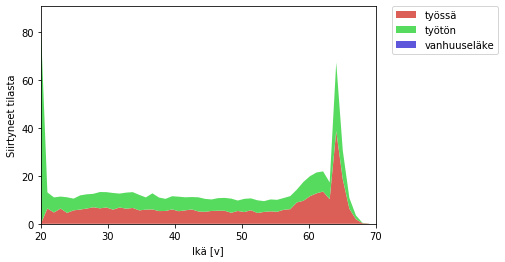

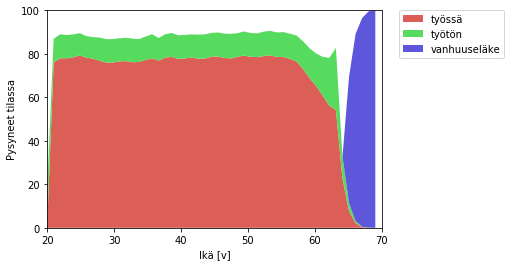

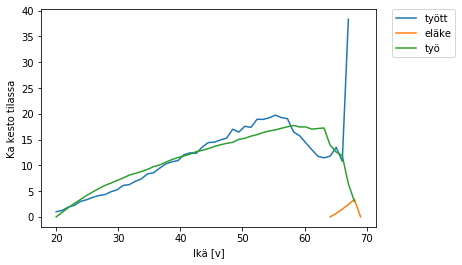

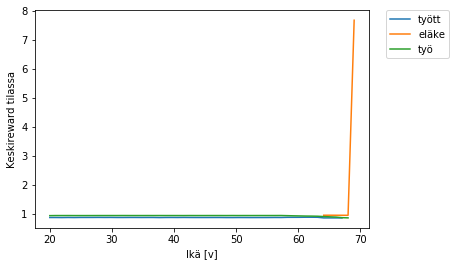

No handles with labels found to put in legend.


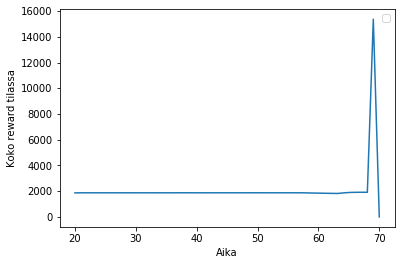

Yhteensä reward 54.52902965164328


In [13]:
cc6=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0,deterministic=False)
cc6.explain()
cc6.run_results(debug=True,steps1=2_000_000,steps2=1_000_000,pop=2_000,deterministic=False,
                train=False,predict=True,batch1=1,batch2=10000,save='saved/malli_perusmini99',
                plot=True,cont=True,start_from='saved/malli_perusmini99',
                results='results/mini_simut_res_softmax',rlmodel='small_acktr')
cc6.render()


minimal model
Parameters of lifecycle:
timestep 1.0
gamma 0.92 (0.92 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness None
deterministic False

include_putki None
step 1.0

train...
phase 1
use_vecmonitor False
use_callback False
batch 1 learning rate 0.25 scaled 0.25

training...







---------------------------------
| explained_variance | 0.986    |
| fps                | 73       |
| nupdates           | 1        |
| policy_entropy     | 0.703    |
| policy_loss        | -0.0806  |
| total_timesteps    | 0        |
| value_loss         | 0.0211   |
---------------------------------



---------------------------------
| explained_variance | 0.837    |
| fps                | 313      |
| nupdates           | 10       |
| policy_entropy     | 0.708    |
| policy_loss        | -0.518   |
| total_timesteps    | 468      |
| v

---------------------------------
| explained_variance | 0.999    |
| fps                | 129      |
| nupdates           | 180      |
| policy_entropy     | 0.801    |
| policy_loss        | 0.00614  |
| total_timesteps    | 9308     |
| value_loss         | 0.00117  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 129      |
| nupdates           | 190      |
| policy_entropy     | 0.826    |
| policy_loss        | 0.00727  |
| total_timesteps    | 9828     |
| value_loss         | 0.00235  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 129      |
| nupdates           | 200      |
| policy_entropy     | 0.903    |
| policy_loss        | 0.0164   |
| total_timesteps    | 10348    |
| value_loss         | 0.00398  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

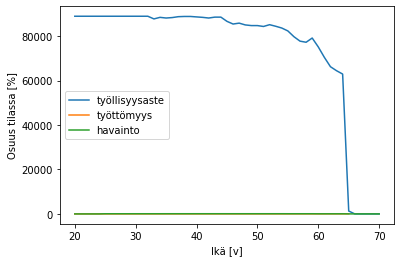

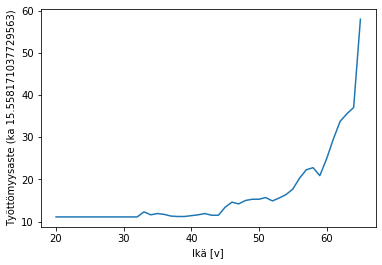

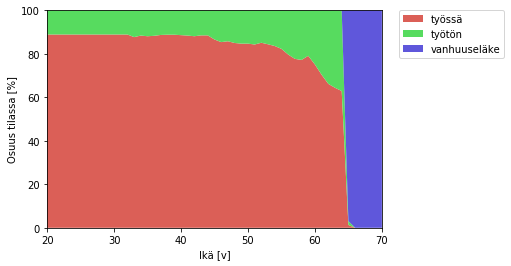

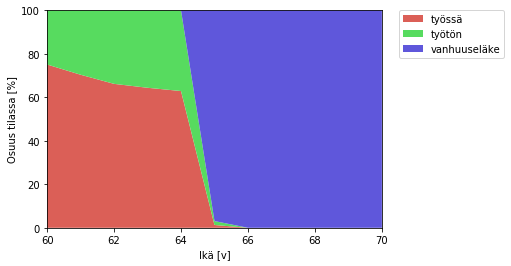

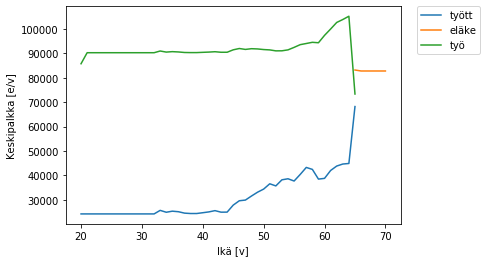

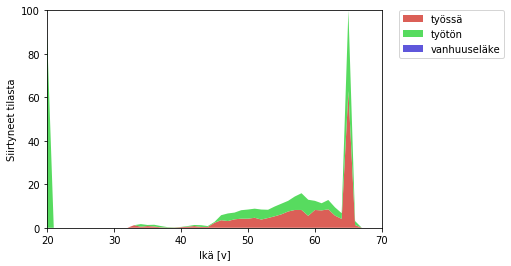

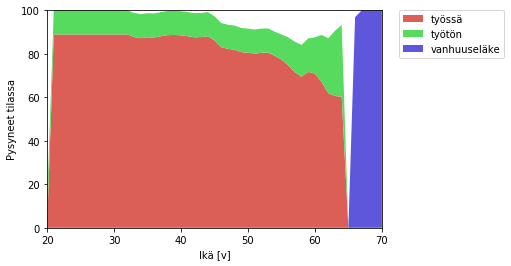

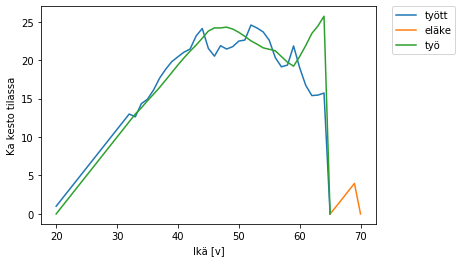

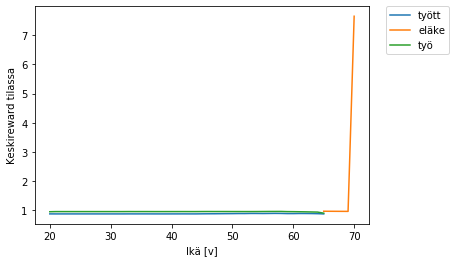

No handles with labels found to put in legend.


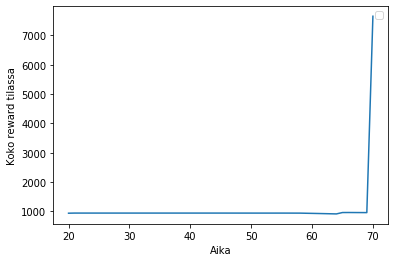

Yhteensä reward 54.53552546884202


In [5]:
cc7=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0,deterministic=True)
cc7.explain()
cc7.run_results(debug=False,steps1=20_000,steps2=2_000_000,pop=1_000,deterministic=True,
                train=True,predict=True,batch1=1,batch2=10000,save='saved/malli_perusmini99',
                plot=True,cont=True,start_from='saved/malli_perusmini99',
                results='results/mini_simut_res',rlmodel='small_acktr',twostage=False)
cc7.render()


# Päätöksenteon vertailu

Lasketaan vertailukohta RL-menetelmällä ACKTR ja katsotaan paljonko tulokset eroavat.

Verrataan ensin hilamallin tuloksia softmax-versioon.

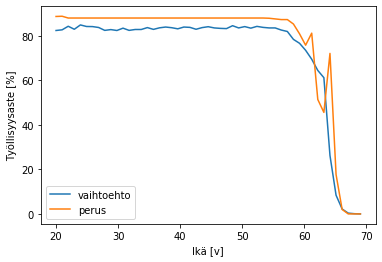

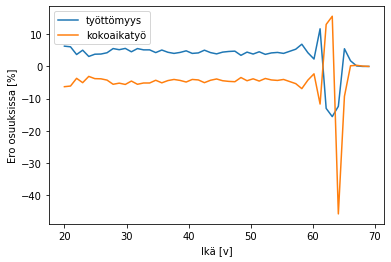

Työllisyysvaikutus 30-63-vuotiaisiin noin -109944.0 htv ja -109944.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -4.739944152262465 prosenttia
Epävarmuus työllisyysasteissa 0.043826932358995874, hajonta 0.031839199407592486


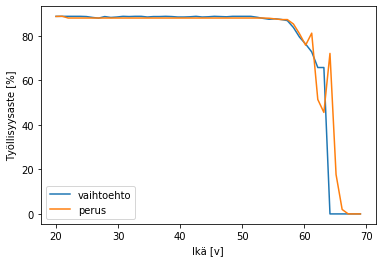

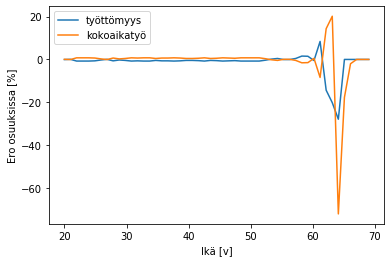

Työllisyysvaikutus 30-63-vuotiaisiin noin 1743.0 htv ja 1743.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 0.07514482516002285 prosenttia
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.036891938210513245


In [17]:
#cc6=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0,deterministic=False)
#cc7=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0,deterministic=True)
#cc6.render(load='results/mini_simut_res_softmax')
#cc7.render(load='results/mini_simut_res')
#cc7.compare_with(cc6)
#cc5.compare_with(cc3)
cc6.compare_with(cc3)

Sitten verrataan "determinististä" sovitetta.

In [ ]:
cc7.compare_with(cc3)

Tehdään sama RL-menetelmällä Deep Q-learning (dqn).

Deterministinen aktion valinta.

In [ ]:
cc6=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
#cc6.train(steps=1_000_000,cont=False,rlmodel='acktr',save='miniperus')
cc6.simulate(pop=10_000,deterministic=True,load='miniperus',rlmodel='acktr',save='results/acktr_tulokset_miniperus_det')
#cc7=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
#cc6.train(steps=1_000_000,cont=False,rlmodel='acktr',save='miniperus')
#cc7.simulate(pop=2_000,deterministic=True,load='miniperus',rlmodel='dqn')

In [ ]:
cc0=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc0.load_sim('results/acktr_tulokset_miniperus')
cc1=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc1.load_sim('results/acktr_tulokset_miniperus_det')
cc1.render()
cc2=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc2.load_sim('results/dp_minimal')
cc2.render()

cc1.compare_with(cc0)
cc1.compare_with(cc2)
#cc5.compare_with(cc7)

In [ ]:
cc2.render()
cc1.render()
cc0.render()

# Päätöksenteon vertailu

Vertaillaan eri mallien tuloksia ja niiden eroja.

In [ ]:
cc6.compare_with(cc3)
cc7.compare_with(cc3)

In [ ]:
cc=DynProgLifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
ika=55
cc.plot_actV(ika,emp=1,time_in_state=0)
cc.RL_simulate_V(ika,rlmodel='acktr',emp=1,time_in_state=0,load='miniperus')
cc.RL_simulate_V(ika,rlmodel='acktr',emp=0,time_in_state=1,load='miniperus')
cc.RL_simulate_V(ika,rlmodel='acktr',emp=2,time_in_state=0,load='miniperus')

# Jakaumat

Reinforced Learningiin sisältyy aina epävarmuutta. Sen määrää tuloksissa voi tarkastella esimerkiksi ajamalla saman mallin monta kertaa ja vertaamalla tuloksia.

In [ ]:
cc=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc.run_results(debug=False,steps1=500_000,steps2=100_000,n=100,pop=5_000,deterministic=True)
#cc.run_results(debug=False,steps1=10_000,steps2=10_000,n=10,train=False,predict=False)

In [ ]:
cc=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc.run_results(debug=False,steps1=10_000_000,steps2=100_000,n=100,pop=5_000,deterministic=False)

In [ ]:
cc=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc.plot_simstats('results/simut_res_stats')